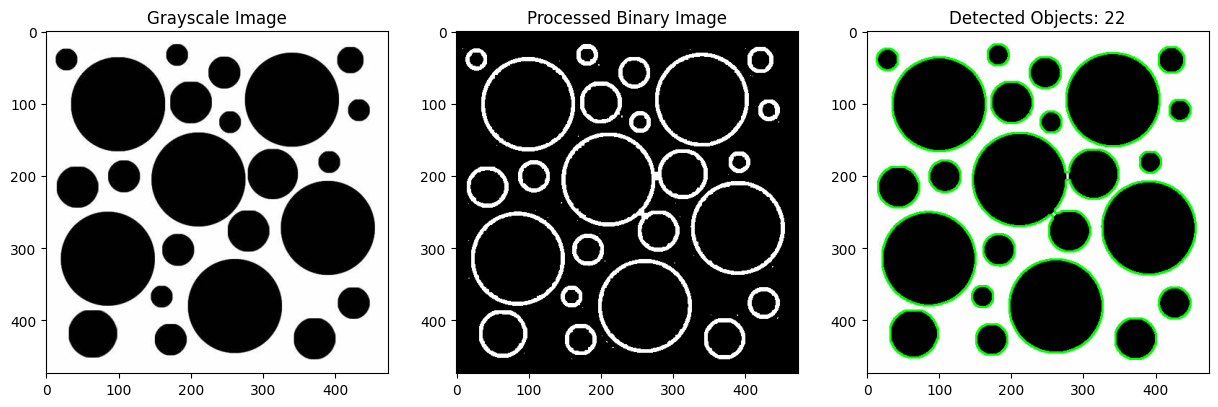

Objects in the image: 22


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('don.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Adaptive Thresholding (better than Canny for varying lighting)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Perform morphological closing to connect gaps
kernel = np.ones((3,3), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Find contours
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove noise
min_area = 100  # Adjust based on object size
filtered_cnts = [c for c in cnts if cv2.contourArea(c) > min_area]

# Draw contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, filtered_cnts, -1, (0, 255, 0), 2)

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Grayscale Image")

axes[1].imshow(closed, cmap='gray')
axes[1].set_title("Processed Binary Image")

axes[2].imshow(rgb)
axes[2].set_title(f"Detected Objects: {len(filtered_cnts)}")

plt.show()

# Print the object count
print("Objects in the image:", len(filtered_cnts))


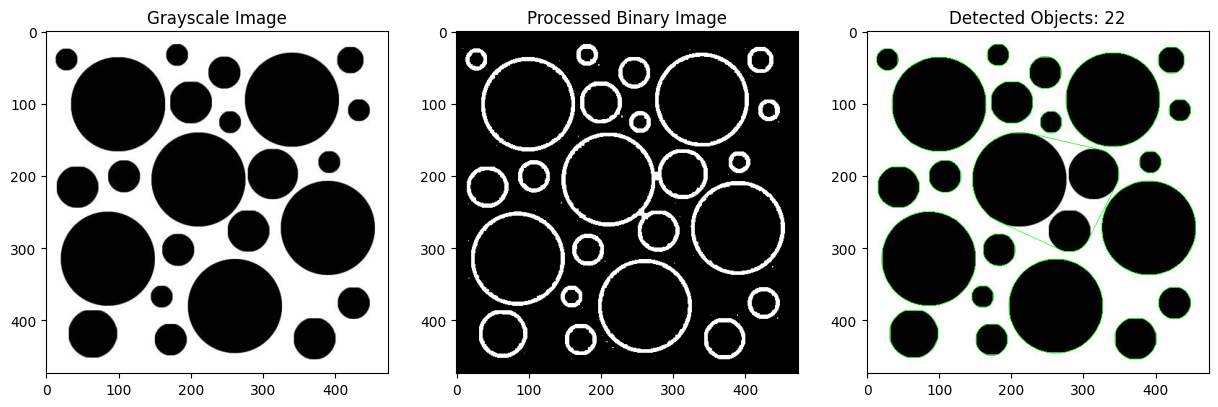

Objects in the image: 22


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('don.jpeg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Adaptive Thresholding (better for varying lighting)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)

# Perform morphological closing to connect gaps
kernel = np.ones((3,3), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Find contours
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove noise
min_area = 100  # Adjust based on object size
filtered_cnts = [c for c in cnts if cv2.contourArea(c) > min_area]

# Apply convex hull to each contour to avoid internal overlaps
hulls = [cv2.convexHull(c) for c in filtered_cnts]

# Convert image to RGB for visualization
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw thin green contours
cv2.drawContours(rgb, hulls, -1, (0, 255, 0), 1)  # Thin green lines

# Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title("Grayscale Image")

axes[1].imshow(closed, cmap='gray')
axes[1].set_title("Processed Binary Image")

axes[2].imshow(rgb)
axes[2].set_title(f"Detected Objects: {len(hulls)}")

plt.show()

# Print the object count
print("Objects in the image:", len(hulls))
